# PU-learning

In [ ]:
# Design plan

# 1) Argparse input
# 2) Input pre-processing
# 3) ML stage
# 4) Additional output: pdfs 

# 1) Argparse input

**Functionality:**

- Input file path
- Output file path
- True genes path
- Pdfs
- ML settings: Choose model, SMOTE, parameters, class_imbalanced procentage
- Some summary

# 2) Input preprocessing

In [47]:
import pandas as pd
from InputProcessingFunctions import *
example = pd.read_csv('../postgap/tmp/output/200_250_filtered_gwas_signal_postgap.txt', sep=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [49]:
mem_usage(example)

'25.14 MB'

In [50]:
list(example)

dtypes = example.dtypes
dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]
column_types = dict(zip(dtypes_col, dtypes_type))
# rather than print all 161 items, we'll
# sample 10 key/value pairs from the dict
# and print it nicely using prettyprint
preview = first2pairs = {key:value for key,value in list(column_types.items())}
print(preview)

{'ld_snp_rsID': 'object', 'chrom': 'object', 'pos': 'int64', 'GRCh38_chrom': 'int64', 'GRCh38_pos': 'int64', 'afr': 'float64', 'amr': 'float64', 'eas': 'float64', 'eur': 'float64', 'sas': 'float64', 'gnomad': 'float64', 'gnomad_sas': 'float64', 'gnomad_oth': 'float64', 'gnomad_asj': 'float64', 'gnomad_nfe': 'float64', 'gnomad_afr': 'float64', 'gnomad_amr': 'float64', 'gnomad_fin': 'float64', 'gnomad_eas': 'float64', 'gene_symbol': 'object', 'gene_id': 'object', 'gene_chrom': 'int64', 'gene_tss': 'int64', 'GRCh38_gene_chrom': 'int64', 'GRCh38_gene_pos': 'int64', 'disease_name': 'object', 'disease_efo_id': 'object', 'score': 'float64', 'rank': 'int64', 'r2': 'float64', 'cluster_id': 'float64', 'gwas_source': 'object', 'gwas_snp': 'object', 'gwas_pvalue': 'float64', 'gwas_pvalue_description': 'object', 'gwas_odds_ratio': 'object', 'gwas_odds_ratio_ci_start': 'object', 'gwas_odds_ratio_ci_end': 'object', 'gwas_beta': 'float64', 'gwas_size': 'int64', 'gwas_pmid': 'object', 'gwas_study': 'ob

In [59]:
preview = {'afr': 'float16',
           'amr': 'float16',
           'eas': 'float16',
           'eur': 'float16',
           'sas': 'float16',
           'gnomad': 'float16',
           'gnomad_sas': 'float16',
           'gnomad_oth': 'float16',
           'gnomad_asj': 'float16',
           'gnomad_nfe': 'float16',
           'gnomad_afr': 'float16',
           'gnomad_amr': 'float16',
           'gnomad_fin': 'float16',
           'gnomad_eas': 'float16',
           'GTEx_Thyroid': 'float32',
           'GTEx_Testis': 'float32',
           'GTEx_Small_Intestine_Terminal_Ileum': 'float32',
           'GTEx_Nerve_Tibial': 'float32',
           'GTEx_Brain_Frontal_Cortex_BA9': 'float32',
           'GTEx_Skin_Not_Sun_Exposed_Suprapubic': 'float32',
           'GTEx_Vagina': 'float32',
           'GTEx_Whole_Blood': 'float32',
           'GTEx_Breast_Mammary_Tissue': 'float32',
           'GTEx_Ovary': 'float32',
           'GTEx_Adipose_Subcutaneous': 'float32',
           'GTEx_Adrenal_Gland': 'float32',
           'GTEx_Heart_Atrial_Appendage': 'float32',
           'GTEx_Stomach': 'float32',
           'GTEx_Brain_Caudate_basal_ganglia': 'float32',
           'GTEx_Colon_Transverse': 'float32',
           'GTEx_Brain_Cerebellum': 'float32',
           'GTEx_Cells_Transformed_fibroblasts': 'float32',
           'GTEx_Esophagus_Muscularis': 'float32',
           'GTEx_Liver': 'float32',
           'GTEx_Muscle_Skeletal': 'float32',
           'GTEx_Prostate': 'float32',
           'GTEx_Pancreas': 'float32',
           'GTEx_Brain_Hypothalamus': 'float32',
           'GTEx_Spleen': 'float32',
           'GTEx_Colon_Sigmoid': 'float32',
           'GTEx_Brain_Anterior_cingulate_cortex_BA24': 'float32',
           'GTEx_Esophagus_Gastroesophageal_Junction': 'float32',
           'GTEx_Brain_Hippocampus': 'float32',
           'GTEx_Brain_Cortex': 'float32',
           'GTEx_Heart_Left_Ventricle': 'float32',
           'GTEx_Artery_Tibial': 'float32',
           'GTEx_Uterus': 'float32',
           'GTEx_Pituitary': 'float32',
           'GTEx_Cells_EBV-transformed_lymphocytes': 'float32',
           'GTEx_Artery_Coronary': 'float32',
           'GTEx_Adipose_Visceral_Omentum': 'float32',
           'GTEx_Brain_Nucleus_accumbens_basal_ganglia': 'float32',
           'GTEx_Brain_Cerebellar_Hemisphere': 'float32',
           'GTEx_Esophagus_Mucosa': 'float32',
           'GTEx_Artery_Aorta': 'float32',
           'GTEx_Brain_Putamen_basal_ganglia': 'float32',
           'GTEx_Lung': 'float32',
           'GTEx_Skin_Sun_Exposed_Lower_leg': 'float32',
           'GTEx': 'float32',
           'VEP': 'uint8',
           'Nearest': 'uint8'}

In [62]:
read_and_optimized = drop_columns(pd.read_csv('../postgap/tmp/output/200_250_filtered_gwas_signal_postgap.txt', sep=',', dtype=preview))
mem_usage(read_and_optimized)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'6.12 MB'

In [22]:
import numpy as np
int_types = ["float16", "float32", "float64"]
for it in int_types:
    print(np.finfo(it))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   e

# 3) ML step

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from var import *

In [2]:
#plot_df = pd.DataFrame(columns = ['truth', 'label', 'output_std'])

In [83]:
# BD - /home/nikita/Desktop/gprior_BD.tsv
# SCZ - /home/nikita/Documents/work/git_projects/GPrior/combined_scz.tsv
gtex_frames = pd.read_csv('/home/nikita/Documents/work/git_projects/GPrior/combined_scz.tsv',sep='\t')
true_genes = pd.read_csv('/home/nikita/Documents/work/git_projects/GWASPriors/SCZ/SCZ/true_genes.csv')
scz_genes = set(true_genes[true_genes['Gene(s)'].map(lambda x: ',' not in str(x))]['Gene(s)']) & set(gtex_frames['gene_symbol'])
# scz_genes = pd.read_csv('/home/nikita/Desktop/true_genes_BD.tsv')['gene_symbol']

In [84]:
gtex_frames = gtex_frames.loc[gtex_frames.apply(lambda x: sum(x == 0), axis=1) <= 80,]
    

In [85]:
80/len(list(gtex_frames))

0.7017543859649122

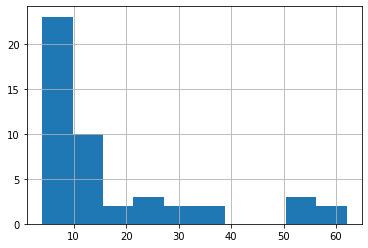

In [86]:
gtex_frames.loc[gtex_frames['gene_symbol'].map(lambda x: x in list(scz_genes)),].apply(lambda x: sum(x == 0), axis=1).hist()

In [87]:
gtex_frames.describe()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,VEP_reg,Vagina,Whole Blood,blastp_similarity,gene_interactions,gtex_similarity,rank,score,vep_mean,vep_sum
count,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,...,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000
mean,28.584493,25.625249,23.304838,29.692512,30.248509,28.253148,33.028827,14.625580,17.840623,17.794566,...,0.269239,31.759112,10.465209,0.055666,0.235918,0.165341,17.585769,0.926623,0.040070,0.311458
std,12.506743,11.754295,13.654474,13.429799,11.603344,14.965573,11.644617,13.853738,14.931557,13.612574,...,0.195315,10.827693,15.381620,0.267972,0.670913,0.545113,15.005451,0.456576,0.157404,1.555573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.007770,0.000000,0.000000
25%,20.000000,18.000000,14.000000,21.000000,24.000000,17.000000,27.000000,4.000000,6.000000,7.000000,...,0.176749,26.000000,0.000000,0.000000,0.000000,0.000000,6.058813,0.941456,0.000000,0.000000
50%,30.000000,25.000000,21.000000,31.000000,31.000000,30.000000,35.000000,9.000000,12.000000,12.000000,...,0.245394,34.000000,2.000000,0.000000,0.000000,0.000000,13.536907,0.980342,0.000000,0.000000
75%,38.000000,34.000000,33.000000,40.000000,39.000000,41.000000,41.750000,23.000000,29.000000,27.000000,...,0.321478,39.000000,15.000000,0.000000,0.000000,0.000000,24.953976,0.996793,0.000000,0.000000
max,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,1.000000,52.000000,52.000000,2.000000,7.000000,7.000000,95.000000,3.086668,1.045455,28.123237


In [89]:
def return_x_y(gtex_frames, scz_genes):
    y = pd.Series(list(gtex_frames['gene_symbol'].map(lambda x: 1 if x in scz_genes else 0)))
    #gtex_frames.drop('gene_id', axis=1, inplace=True)
    x = gtex_frames.fillna(0).set_index('gene_symbol')
    return x, y

x, y = return_x_y(gtex_frames, scz_genes)

In [90]:
for i in x[(y==1).values].index:
    print(i)

ZNF804A
NLGN4X
GALNT10
MEF2C
ZNF536
C12orf42
C12orf79
LRRIQ3
TMTC1
CYP26B1
GRIN2A
FUT9
LUZP2
GRM3
SATB2
SNX19
CNTN4
MAD1L1
CACNA1I
ATP2A2
CACNA1C
MMP16
IMMP2L
ERCC4
HCN1
SNAP91
CSMD1
RIMS1
TCF4
TBC1D5
GPM6A
C11orf87
EPC2
TRANK1
CACNB2
TLE1
DRD2
CNKSR2
GRAMD1B
PJA1
PODXL
ZSWIM6
BCL11B
IGSF9B
PRKD1
KCNV1
TSNARE1


In [9]:
new_x = x.copy()
new_x['y'] = list(y.map(lambda x: str(bool(x))))
new_x.groupby('y').aggregate({'VEP':'mean'})

,VEP
y,
False,0.025152
True,0.488994


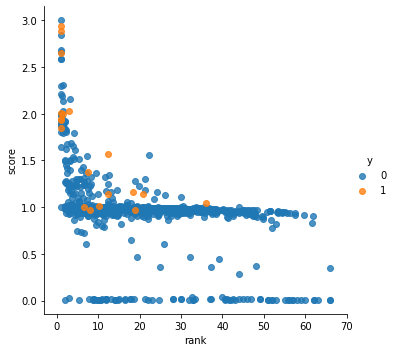

In [11]:
new_x = x.copy() 
new_x['y'] = list(y)
sns.lmplot(data = new_x, x = 'rank', y='score', hue='y', fit_reg=False)

# Real data Expreriment

In [12]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#x_norm = scale(x)
# X_train, X_test, y_train, y_test =  train_test_split(x, y, 
#                                                      test_size=0.15)

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# def return_SMOTE(X_train, y_train, ratio=0.5):
#     sampler = SMOTE(ratio=0.5, random_state=42)
#     X_rs, y_rs = sampler.fit_sample(X_train, y_train)
#     return X_rs, y_rs

# if sum(y_train)/len(y_train) <= 0.3:
#     new_X_train, new_y_train = return_SMOTE(X_train, y_train)

In [75]:
# Models

# svc = SVC(probability=True, class_weight={1:1, 0:100})
# rf = RandomForestClassifier()
# lr = LogisticRegression(class_weight={1:1, 0:100})
# xgb = XGBClassifier(
#         eval_metric = 'auc',
#         learning_rate=0.1,
#         nthread = 4,
#         silent = True,
#         objective='binary:logistic',
#         class_weight={1:1, 0:100})

In [76]:
# PARAM_DIST_RF = {'max_depth': [5, 10, 15, 20, 30, 50, 100],
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'criterion': ['gini', 'entropy']}
#                #'min_samples_leaf': [1, 2, 4],
#                #'min_samples_split': [2, 5, 10]}
        
# PARAM_DIST_SVC = {'C':[1,10,100,1000],
#                 'gamma':[1,0.1,0.001,0.0001],
#                 'kernel':['linear','rbf']}
                    
# PARAM_DIST_LR = {"C":np.logspace(-3,3,10),
#                  "penalty":["l1","l2"]}

# PARAM_DIST_XGB = {'gamma':[2,1,0.1,0.01,0.001,0.0001]}
#                  'eta': [0.05, 0.1, 0.3],
#                  'max_depth': [6, 9, 12]}
#                  'gamma':[1,0.1,0.001]
#                  'min_child_weight': [1, 2, 5]
#                  'num_boost_round': [100, 250, 500],
#                  'subsample': [0.9, 1.0],
#                  'colsample_bytree': [0.9, 1.0],
#                  'colsample_bylevel': [0.9, 1.0]}

In [10]:
# parameters_rf = best_parameters(rf, X_train, y_train, PARAM_DIST_RF)

# Best Parameters using grid search: 
#  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None}

In [11]:
# rf.set_params(bootstrap = True,
#               criterion = parameters_rf['criterion'],
#               max_depth = parameters_rf['max_depth'],
#               max_features = parameters_rf['max_features'],
#               min_samples_leaf = 1,
#               min_samples_split = 2,
#               n_estimators=700,
#               class_weight={1:100, 0:1})

In [12]:
# rf.fit(x, y)
# y_pred = rf.predict(X_test)
# print(confusion_matrix(y_test, y_pred))

In [13]:
# parameters_lr = best_parameters(lr, new_X_train, new_y_train, PARAM_DIST_LR)
# lr.set_params(C = parameters_lr['C'],
#               penalty = parameters_lr['penalty'])

# Best Parameters using grid search: 
#  {'C': 46.41588833612773, 'penalty': 'l1'}

In [14]:
# parameters_svc = best_parameters(svc, new_X_train, new_y_train, PARAM_DIST_SVC)
# svc.set_params(C=parameters_svc['C'],
#                 gamma=parameters_svc['gamma'],
#                 kernel=parameters_svc['kernel'])

# Best Parameters using grid search: 
#  {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [96]:
# def best_parameters_xgb(model, new_X_train, new_y_train, X_test, y_test, param_dist):
#     cv_rf = GridSearchCV(model, cv = 5,
#                      param_grid=param_dist, 
#                      n_jobs = 3,
#                      scoring='neg_log_loss')
#     cv_rf.fit(new_X_train, new_y_train, eval_metric='logloss', verbose=True,
#             eval_set=[(new_X_train, new_y_train),(X_test, y_test)], early_stopping_rounds=100)
#     print('Best Parameters using grid search: \n', 
#       cv_rf.best_params_)
#     return cv_rf.best_params_


In [97]:
# xgb_X_train = pd.DataFrame(new_X_train, columns=list(X_test))

In [15]:
#parameters_xgb = best_parameters_xgb(xgb, xgb_X_train, new_y_train, X_test, y_test, PARAM_DIST_XGB)

# xgb.set_params(num_boost_round=150,
#                 eta=parameters_xgb['eta'],
#                 max_depth=parameters_xgb['max_depth'],
#                 subsample=1, # parameters_xgb['subsample']
#                 colsample_bytree=0.9, #  parameters_xgb['colsample_bytree']
#                 colsample_bylevel=0.9, #  parameters_xgb['colsample_bylevel']
#                 gamma=0.001,
#                 min_child_weight=1,
#                 n_estimators=700)


# XGBClassifier(base_score=0.5, booster='gbtree', class_weight={1: 1, 0: 100},
#        colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.9,
#        eta=0.05, eval_metric='auc', gamma=0.001, learning_rate=0.1,
#        max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
#        n_estimators=700, n_jobs=1, nthread=4, num_boost_round=150,
#        objective='binary:logistic', random_state=0, reg_alpha=0,
#        reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
#        subsample=1, verbosity=1)

In [30]:
from sklearn import preprocessing

def final_output(x, y, model, n_estimators=100):
    
    from sklearn.preprocessing import MinMaxScaler, RobustScaler
    
    from var import PARAM_DIST_RF, PARAM_DIST_SVC, PARAM_DIST_LR, PARAM_DIST_DT
    
    scaler = preprocessing.RobustScaler()
    
    weights = {1:100, 0:1}
    
    if model in ['svc', 'lr']:
        x = pd.DataFrame(scaler.fit_transform(x))
    
    iP = y[y > 0].index
    iU = y[y <= 0].index
    
    num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    
    for _ in range(n_estimators):
                
        # Get a bootstrap sample of unlabeled points for this round
        ib = np.random.choice(iU, replace = True, size = len(iP))
    
        # Find the OOB data points for this round
        i_oob = list(set(iU) - set(ib))
    
        # Get the training data (ALL positives and the bootstrap
        # sample of unlabeled points) and build the tree
        Xb = x[list(y>0)].append(x.iloc[ib])
        yb = y[y > 0].append(y.iloc[ib])
                
        if model == 'rf':
            estimator = RandomForestClassifier(class_weight=weights,
                                               n_estimators=15)
            parameters_rf = best_parameters(estimator, Xb, yb, PARAM_DIST_RF)
            estimator.set_params(bootstrap = True,
              max_depth = parameters_rf['max_depth'],
              max_features = parameters_rf['max_features'],
              min_samples_leaf = parameters_rf['min_samples_leaf'],
              min_samples_split = parameters_rf['min_samples_split'],
              n_estimators=600)
        elif model == 'svc':
            Xb = x[list(y>0)].append(x.iloc[ib])
            estimator = SVC(probability=True,
                            class_weight=weights)
            parameters_svc = best_parameters(estimator, Xb, yb, PARAM_DIST_SVC)
            estimator.set_params(C=parameters_svc['C'],
                                 gamma=parameters_svc['gamma'],
                                 kernel=parameters_svc['kernel'])
        elif model == 'dt':
            estimator = DecisionTreeClassifier(criterion='gini',
                                               class_weight=weights)
            parameters_dt = best_parameters(estimator, Xb, yb, PARAM_DIST_DT)
            estimator.set_params(max_depth = parameters_dt['max_depth'],
                           min_samples_leaf = parameters_dt['min_samples_leaf'],
                           min_samples_split = parameters_dt['min_samples_split'])
        elif model == 'lr':
            estimator = LogisticRegression(class_weight=weights,
                                           solver='liblinear')
            parameters_lr = best_parameters(estimator, Xb, yb, PARAM_DIST_LR)
            estimator.set_params(C = parameters_lr['C'],
                          penalty = parameters_lr['penalty'])
        
        estimator.fit(Xb, yb)
        # Record the OOB scores from this round
        sum_oob.loc[i_oob, 0] += estimator.predict_proba(x.iloc[i_oob])[:,1]
        num_oob.loc[i_oob, 0] += 1
    
    results = pd.DataFrame(x.index)
    results['Average_prob'] = sum_oob / num_oob
    print(f'Model "{model}" - Done!')
    return results

In [31]:
def best_parameters(model, new_X_train, new_y_train, param_dist):
    cv_rf = GridSearchCV(model, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3,
                     iid=False)
    cv_rf.fit(new_X_train, new_y_train)
    print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
    return cv_rf.best_params_

In [32]:
def mean_model_prob(plot_df):
    models = ['lr', 'rf', 'dt', 'svc']
    mean_prob = np.array([0.0]*len(plot_df['rf_results']))
    for model in models:
        mean_prob += np.array(plot_dfs[f'{model}_results']['predicted_y'])
    result = pd.DataFrame({'predicted_y':mean_prob/len(models)})
    plot_df['mean_results'] = result
    return plot_df

In [33]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = ['lr', 'svc', 'rf', 'dt'] # , 'LR':lr, 'XGB':xgb, 'SVC':svc

plot_dfs = {'rf_results':0,
            'svc_results':0,
            'lr_results':0,
            'dt_results':0}

for model in models:
    predicted_y = final_output(x, y, model)['Average_prob']
    plot_dfs[f'{model}_results'] = pd.DataFrame({"true_y":y,
                                               "predicted_y":predicted_y})

Best Parameters using grid search: 
 {'C': 0.001, 'penalty': 'l1'}
Best Parameters using grid search: 
 {'C': 0.004124626382901352, 'penalty': 'l1'}
Best Parameters using grid search: 
 {'C': 0.8376776400682924, 'penalty': 'l2'}
Best Parameters using grid search: 
 {'C': 4.923882631706742, 'penalty': 'l1'}
Best Parameters using grid search: 
 {'C': 0.008376776400682925, 'penalty': 'l1'}
Best Parameters using grid search: 
 {'C': 242.44620170823308, 'penalty': 'l1'}
Best Parameters using grid search: 
 {'C': 0.2030917620904737, 'penalty': 'l2'}
Best Parameters using grid search: 
 {'C': 0.2030917620904737, 'penalty': 'l1'}
Best Parameters using grid search: 
 {'C': 0.004124626382901352, 'penalty': 'l1'}
Best Parameters using grid search: 
 {'C': 0.001, 'penalty': 'l1'}
Best Parameters using grid search: 
 {'C': 701.7038286703837, 'penalty': 'l1'}
Best Parameters using grid search: 
 {'C': 4.923882631706742, 'penalty': 'l2'}
Best Parameters using grid search: 
 {'C': 0.008376776400682925

In [34]:
plot_dfs = mean_model_prob(plot_dfs)

In [67]:
# import math
# plot_dfs['mean_results']
# plot_dfs['mean_results'][plot_dfs['mean_results']['predicted_y'].map(lambda x: math.isnan(x))] = 1.0

In [68]:
# plot_dfs['mean_results'][plot_dfs['mean_results']['predicted_y'].map(lambda x: math.isnan(x))]

,predicted_y


In [ ]:
# gtex_frames['mean_results'] = plot_dfs['mean_results']

In [47]:
for key, value in plot_dfs.items():
    ind = x.index
    pd.DataFrame({'gene_symbol': ind, 'Mean':value['predicted_y']}).to_csv(f'/home/nikita/Desktop/triple_phe/BD/{key}.tsv', sep='\t', index=False)

In [113]:
true_genes = pd.read_csv('/home/nikita/Documents/work/git_projects/GWASPriors/SCZ/SCZ/true_genes.csv')
scz_genes = set(true_genes[true_genes['Gene(s)'].map(lambda x: ',' not in str(x))]['Gene(s)']) & set(gtex_frames['gene_symbol'])

In [115]:
gsea = scz_genes

In [116]:
gsea = pd.read_csv('/home/nikita/Downloads/efotraits_EFO_0000289-associations-2019-10-9(1).csv', sep=',')['Mapped gene'].values

In [117]:
gsea

array(['HLA-V, AL645939.3', 'CACNA1C', 'IPO8', 'LINC02033, HSPD1P6',
       'TRIM26', 'ITIH3', 'LINC02033, HSPD1P6', 'IPO8', 'PCDH12',
       'AC069288.1, MAD1L1', 'DNM1P41, EFL1P1', 'MIR137HG',
       'GPR89P, RSL24D1P1', 'HLA-V, AL645939.3', 'U95743.1, U91319.1',
       'ANK3', 'ITIH1', 'LINC02033, HSPD1P6', 'FADS2', 'GRIN2A', 'LMAN2L',
       'LINC02033, HSPD1P6', 'AC006252.1, PPM1M', 'LMAN2L',
       'CCDC68, LINC01929', 'ANK3', 'CACNA1C, CACNA1C-IT3', 'LINC01592',
       'LINC02033, HSPD1P6', 'MAD1L1, AC069288.1', 'NFIX', "'-", "'-",
       'ITIH3', 'ANK3', 'TENM4', 'FADS2, FADS1', 'PUS7, SRPK2', 'NCAN',
       'GPR89P, RSL24D1P1', 'MAD1L1, AC069288.1', 'LINC02033, HSPD1P6',
       'AC069288.1, MAD1L1', 'NCAN', 'SCN2A', 'CNNM2', 'TENM4', 'ITIH1',
       'CACNA1C', 'AL157359.1', 'AL157359.1', 'THSD7A', 'ANK3', 'SDCCAG8',
       "'-", 'AL589740.1', 'SYNE1', 'CACNA1C', 'PGAP3, ERBB2',
       'AC018754.1, LINC02488', 'GULOP', 'CACNA1C', 'LMO7',
       'FADS2, FADS1', 'PIK3C2A', 'AL391

In [145]:
gsea = set(bd['gene_symbol']) & set(scz['gene_symbol'])

In [118]:
import glob
import os

path = r'/home/nikita/Desktop/pathways/data/' # use your path
all_files = glob.glob(os.path.join(path, "*.tsv"))



for filename in all_files:
    df = pd.read_csv(filename, sep='\t')
    from plotnine import *
    df['y'] = df['gene_symbol'].map(lambda x: x in gsea)
    print(sum(df['y'].values))
    df['gene_symbol'] = [i for i in range(len(df))]
    fig = (
        ggplot(df[df['y'] == True], aes(x='gene_symbol', col='y')) +
              geom_density(fill="#56B4E9", alpha = 0.3, colour = None, show_legend = True) +
              geom_rug(color='black', show_legend = True) +
              theme_bw() +
              theme(plot_title = element_text(hjust = 0.5, size=12), figure_size = (10, 6)) +
              theme(legend_background = element_rect(fill="gray90", size=.5, linetype="dotted")) +
              theme(legend_title = element_text(colour="black", size=12)) +
              ggtitle('Distribution of gene names from extended list') +
              xlab(f'Sorted in descending order gene names {filename}') +
              ylab('Density')
            )
    save_as_pdf_pages([fig], )


69


/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: plotnine-save-8777132366270.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


47


/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: plotnine-save-8777132367031.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [24]:
from sklearn.decomposition import PCA
import itertools
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
plot_x = pd.DataFrame(scaler.fit_transform(x))

pca = PCA(9)  # project from 64 to 2 dimensions
projected = pca.fit_transform(plot_x)

Text(0.5, 0, 'component 1')

Text(0, 0.5, 'component 2')

Text(0.5, -0.15, '1) lr')

Text(0.5, 0, 'component 1')

Text(0, 0.5, 'component 2')

Text(0.5, -0.15, '2) svc')

Text(0.5, 0, 'component 1')

Text(0, 0.5, 'component 2')

Text(0.5, -0.15, '3) rf')

Text(0.5, 0, 'component 1')

Text(0, 0.5, 'component 2')

Text(0.5, -0.15, '4) mean')

Text(0.5, 0, 'component 1')

Text(0, 0.5, 'component 2')

Text(0.5, -0.15, '5) dt')

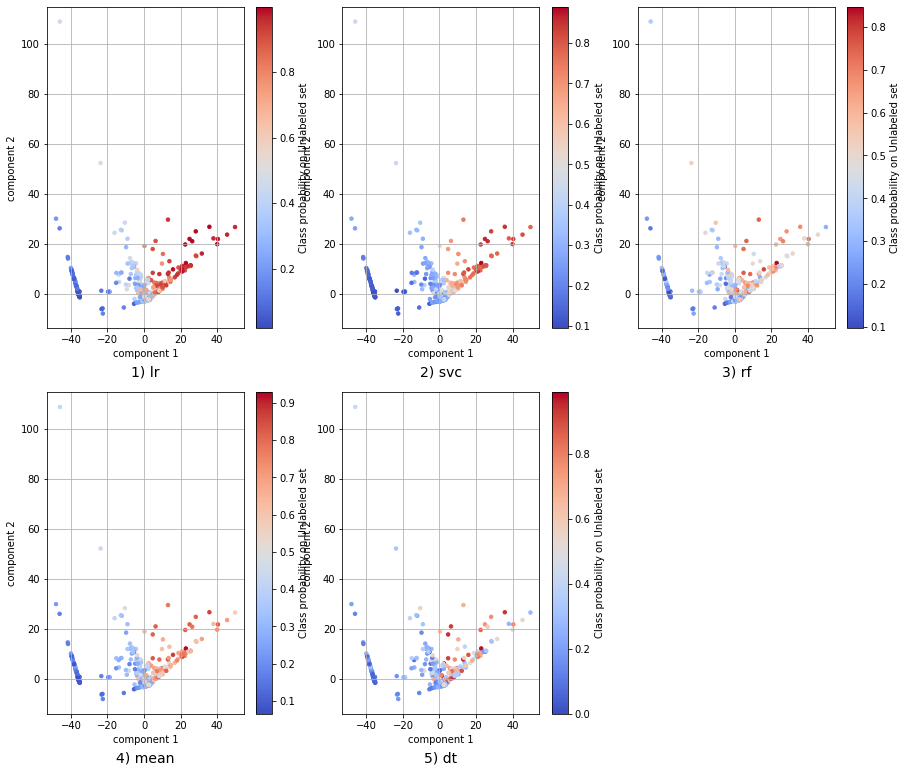

In [35]:
fig = plt.figure(figsize=(15, 13))
models = ['lr', 'svc', 'rf', 'mean', 'dt']

for i, name in zip(range(5), models):
    ax1 = fig.add_subplot(231 + i)
    sp= ax1.scatter(projected[:,0], projected[:, 1], c=plot_dfs[f'{name}_results']['predicted_y'], 
                linewidth=1, s=12, alpha=1, cmap=plt.cm.get_cmap('coolwarm'), label='unlabeled')
    plt.grid()
    plt.xlabel(f'component {1}')
    plt.ylabel(f'component {2}')
    plt.colorbar(sp, label='Class probability on Unlabeled set')
    ax1.text(0.5,-0.15, f"{i+1}) {name}", size=14, ha="center", 
         transform=ax1.transAxes)
fig.savefig('scz_comparison.pdf')


,predicted_y
0,0.370272
1,0.338661
2,0.251404
3,0.491017
4,0.364129
...,...
1161,0.526277
1162,0.487038
1163,0.399776
1164,0.657104


(-50, 60)

(-10, 40)

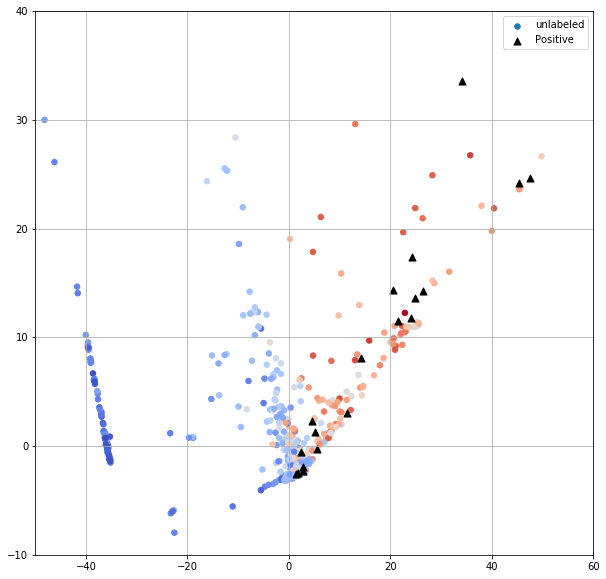

In [46]:
i = 0
j = 1
# data_P = X[y==1]
# data_U = np.concatenate((X[y==1][rp[int(len(rp)*known_labels_ratio):]], X[y==0]), axis=0)
fig = plt.figure(figsize=(10, 10))
plt.scatter(projected[:,i], projected[:, j], c=plot_dfs[f'mean_results']['predicted_y'], 
                linewidth=1, s=30, alpha=1, cmap=plt.cm.get_cmap('coolwarm'), label='unlabeled')
#plt.scatter(projected[y==0, i], projected[y==0, j], c='', marker='.', linewidth=0, s=30, alpha=0.5, label='Unlabelled')
plt.scatter(projected[y==1, i], projected[y==1, j], c='black', marker='^', linewidth=1, s=50, alpha=1, label='Positive')
plt.grid()
plt.legend()
axes = plt.gca()
axes.set_xlim([-50,60])
axes.set_ylim([-10,40])
fig.savefig('scz_real_data.pdf')

In [42]:
d = {'lr':[], 'rf':[], 'dt':[], 'svc':[]}
for name in models:
    new_df = plot_dfs[f'{name}_results']
    new_df['gene_symbol'] = x.index
    result = new_df.sort_values(by=['predicted_y'], ascending=False).dropna()
    d[name] = result['gene_symbol'][1:21]
    #result.to_csv(f'/home/nikita/Desktop/project_output/experiments/{name}_results.tsv', sep='\t', index=False)

In [100]:
set(d['dt']) & set(d['svc']) & set(d['lr']) & set(d['rf'])

{'BRINP3', 'NEGR1', 'RGS5'}

In [ ]:
# http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [109]:
mean_df = pd.DataFrame({'Mean':0}, index=x.index)

for name in models:
    new_df = plot_dfs[f'{name}_results']
    mean_df['Mean'] = mean_df['Mean'].values + new_df['predicted_y'].values
#     result = new_df.sort_values(by=['predicted_y'], ascending=False).dropna()
#     d[name] = result['gene_symbol'][1:21]

In [149]:
#new_final = new_final.sort_values(by=['Average_prob'], ascending=False).dropna()

In [111]:
mean_df['Mean'] =  mean_df['Mean']/4

In [113]:
mean_df = mean_df.sort_values(by=['Mean'], ascending=False).dropna()

In [114]:
mean_df

,Mean
gene_symbol,
NLGN1,0.972648
RGS5,0.964226
BRINP3,0.963059
NEGR1,0.961132
GRIN2B,0.958495
...,...
ETAA1,0.009536
INTS4,0.009494
RPLP0,0.009188


In [116]:
mean_df.to_csv('/home/nikita/Desktop/project_output/experiments/stacking.tsv',index=True, sep='\t')

In [57]:
models = [lr, rf, svc, xgb]

In [61]:
model = rf
model.fit(new_X_train, new_y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1022   19]
 [   6   10]]


In [109]:
xgb_X_test =np.array(X_test)
xgb.fit(new_X_train, new_y_train)
y_pred = xgb.predict(xgb_X_test)
print(confusion_matrix(y_test, y_pred))

[[1094   10]
 [  14    9]]


In [62]:
rf.fit(new_X_train, new_y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1021   20]
 [   4   12]]


# After feature selection

In [63]:
rf.fit(new_X_train, new_y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 1, 0: 100},
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [64]:
import numpy as np

names_index = list(x)

def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

var_imp_rf = variable_importance(rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'vep_sum' has a Mean Decrease in Impurity of 0.07006
2. The feature 'score' has a Mean Decrease in Impurity of 0.06910
3. The feature 'VEP' has a Mean Decrease in Impurity of 0.04393
4. The feature 'rank' has a Mean Decrease in Impurity of 0.04185
5. The feature 'gene_interactions' has a Mean Decrease in Impurity of 0.04129
6. The feature 'Nearest' has a Mean Decrease in Impurity of 0.04101
7. The feature 'vep_mean' has a Mean Decrease in Impurity of 0.03040
8. The feature 'Brain - Amygdala' has a Mean Decrease in Impurity of 0.01596
9. The feature 'DHS' has a Mean Decrease in Impurity of 0.01347
10. The feature 'gtex_similarity' has a Mean Decrease in Impurity of 0.01273
11. The feature 'Brain - Anterior cingulate cortex (BA24)' has a Mean Decrease in Impurity of 0.01266
12. The feature 'VEP_reg' has a Mean Decrease in Impurity of 0.01205
13. The feature 'Regulome' has a Mean Decrease in Impurity of 0.01171
14. The feature 'Brain - Putamen (basal gangli

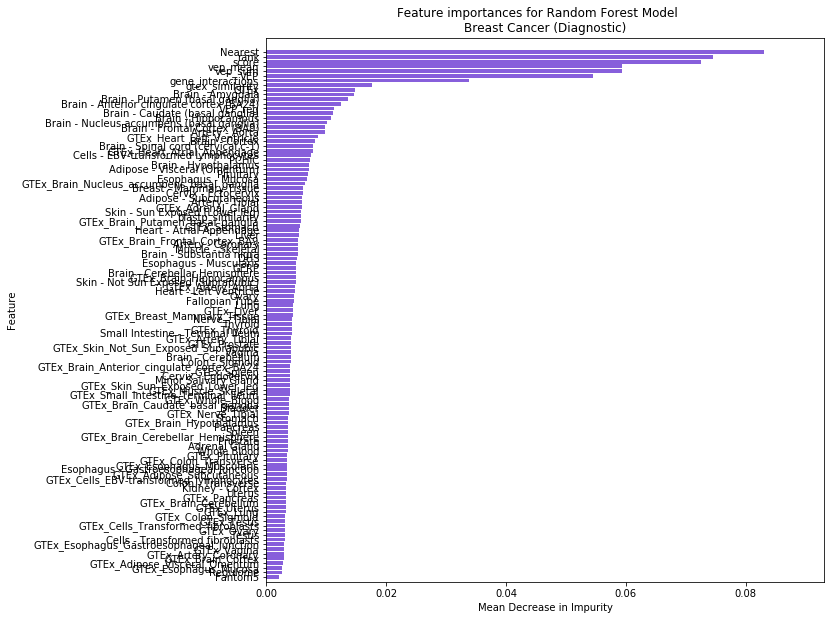

In [34]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 115)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

variable_importance_plot(importances_rf, indices_rf, names_index)

In [81]:
X_train_reduced = X_train.iloc[:,var_imp_rf['index'][:25]]
X_test_reduced = X_test.iloc[:,var_imp_rf['index'][:25]]

In [82]:
next_X_train, next_y_train = return_SMOTE(X_train_reduced, y_train)

In [83]:
rf = RandomForestClassifier(random_state=42)

In [84]:
new_parameters = best_parameters(rf, next_X_train, next_y_train, PARAM_DIST)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto'}


In [40]:
rf.set_params(criterion = new_parameters['criterion'], 
              max_depth = new_parameters['max_depth'], 
              max_features = new_parameters['max_features'],
              n_estimators=750,
              bootstrap=True,
              warm_start=False, 
              oob_score=False,
              min_samples_leaf = 1,
              min_samples_split = 2,
              class_weight = {1:1, 0:100})

RandomForestClassifier(bootstrap=True, class_weight={1: 1, 0: 100},
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=750, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

In [85]:
rf.fit(next_X_train, next_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
from sklearn.calibration import CalibratedClassifierCV
calib_model = CalibratedClassifierCV(rf, cv='prefit', method='sigmoid')
calib_model.fit(next_X_train, next_y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
            cv='prefit', method='sigmoid')

In [87]:
y_pred = calib_model.predict(X_test_reduced)
confusion_matrix(y_test, y_pred)

array([[1094,   10],
       [  16,    7]])

# PU learning

In [73]:
new_x = x #.iloc[:,var_imp_rf['index'][:25]]

In [74]:
n_estimators = 100
model = rf
model.set_params(criterion = new_parameters['criterion'], 
              max_depth = new_parameters['max_depth'], 
              max_features = new_parameters['max_features'],
              n_estimators=750,
              bootstrap=True,
              warm_start=False, 
              oob_score=False,
              min_samples_leaf = 1,
              min_samples_split = 2,
              class_weight = {1:1, 0:100})
estimator = CalibratedClassifierCV(model, cv=5, method='sigmoid')
estimator.fit(new_x, y)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight={1: 1, 0: 100},
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=750, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
            cv=5, method='sigmoid')

In [75]:
ml_list = [estimator, new_x, y]

In [76]:
def final_output(ml_list, n_estimators=100):
    
    estimator = ml_list[0]
    new_x = ml_list[1]
    y = ml_list[2]
    iP = y[y > 0].index
    iU = y[y <= 0].index
    num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    
    for _ in range(n_estimators):
        # Get a bootstrap sample of unlabeled points for this round
        ib = np.random.choice(iU, replace = True, size = 3 * len(iP))
    
        # Find the OOB data points for this round
        i_oob = list(set(iU) - set(ib))
    
        # Get the training data (ALL positives and the bootstrap
        # sample of unlabeled points) and build the tree
        Xb = new_x[list(y>0)].append(new_x.iloc[ib])
        yb = y[y > 0].append(y.iloc[ib])
        calib_model = estimator
        calib_model.fit(Xb, yb)
        # Record the OOB scores from this round
        sum_oob.loc[i_oob, 0] += calib_model.predict_proba(new_x.iloc[i_oob])[:,1]
        num_oob.loc[i_oob, 0] += 1
    results = pd.DataFrame(new_x.index)
    results['Average_prob'] = sum_oob / num_oob
    return results

In [77]:
results = final_output(ml_list)

In [78]:
results = results.sort_values(by=['Average_prob'], ascending=False)

In [79]:
results

,gene_symbol,Average_prob
174,RBFOX1,0.913146
947,NLGN1,0.907415
1456,CALN1,0.904363
2147,NOL4,0.903255
2834,NTRK3,0.903099
...,...,...
2655,BCL11B,NaN
2761,IGSF9B,NaN
2864,PRKD1,NaN
2943,KCNV1,NaN


In [80]:
results.to_csv('/home/nikita/Desktop/scz.tsv', sep='\t')

In [153]:
# 'gtex_similarity',
#  'blastp_similarity',
#  'gene_interactions',
#  'gene_interactions_within_data'
set(x['gtex_similarity'])

{0, 1, 2, 3, 4, 5, 7}

In [236]:
results = results.sort_values(by=['Average_prob'], ascending=False).dropna()

In [237]:
results.to_csv('/home/nikita/Desktop/rf_100_just_rf_calib.tsv', sep='\t')

In [65]:
up_list = results[results['Average_prob'] >= 0.03].index

In [66]:
estimator = ml_list[0]
new_x = ml_list[1]
y = ml_list[2]
iP = y[y > 0].index
iU = y[y <= 0].index
num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    
for _ in range(n_estimators):
    # Get a bootstrap sample of unlabeled points for this round
    ib = np.random.choice(iU, replace = True, size = 3 * len(iP))
    
    ib = list(filter(lambda gene: gene not in up_list, ib))
    
    # Find the OOB data points for this round
    i_oob = list(set(iU) - set(ib))
    
    # Get the training data (ALL positives and the bootstrap
    # sample of unlabeled points) and build the tree
    Xb = new_x[list(y>0)].append(new_x.iloc[ib])
    yb = y[y > 0].append(y.iloc[ib])
    estimator.fit(Xb, yb)
    
        # Record the OOB scores from this round
    sum_oob.loc[i_oob, 0] += estimator.predict_proba(new_x.iloc[i_oob])[:,1]
    num_oob.loc[i_oob, 0] += 1
    
results = pd.DataFrame(new_x.index)
results['Average_prob'] = sum_oob / num_oob

In [67]:
results

,gene_symbol,Average_prob
0,KCNB1,0.753997
1,PTPRZ1,0.100385
2,KXD1,0.025165
3,PMM1,0.025233
4,TGDS,0.025190
...,...,...
2155,TMX2,0.027307
2156,ANKRD11,0.036138
2157,DEFB106A,0.025728
2158,INSM1,0.025447


In [301]:
results = results.sort_values(by=['Average_prob'], ascending=False).dropna()

In [302]:
results.to_csv('/home/nikita/Desktop/xb_100_with_pu_and_new_f.tsv', sep='\t')

In [91]:
len(x.index)

2160

#  xgboost

In [285]:
def xgb_model(train_data, train_label, test_data, test_label):
    clf = xgb.XGBClassifier(max_depth=10,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=800,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None,
                           class_weight = {1:.9, 0:.1})
    clf.fit(train_data, train_label, eval_metric='auc', verbose=True,
            eval_set=[(test_data, test_label)], early_stopping_rounds=100)
    y_pre = clf.predict(test_data)
    y_pro = clf.predict_proba(test_data)[:, 1]
    #print "AUC Score : %f" % metrics.roc_auc_score(test_label, y_pro)
    #print"Accuracy : %.4g" % metrics.accuracy_score(test_label, y_pre)
    return clf

In [286]:
next_X_train = pd.DataFrame(next_X_train, columns=list(X_train_reduced))
X_test_reduced = pd.DataFrame(X_test_reduced, columns=list(X_train_reduced))

In [62]:
xgb_model = xgb_model(next_X_train, next_y_train, X_test_reduced, y_test)

In [288]:
y_pred = xgb_model.predict(X_test_reduced)
confusion_matrix(y_test, y_pred)

array([[741,   0],
       [  1,  14]])

In [206]:
calib_model = CalibratedClassifierCV(xgb_model, cv='prefit', method='sigmoid')

In [ ]:
# References:

#1) https://www.inertia7.com/projects/95
#1*) https://www.datascience.com/resources/notebooks/random-forest-intro

In [1]:
from var import *

In [2]:
def add_gene_similarity_feature(df, db, causal_genes):
    """
    For each gene in df counts how many similar genes are in true_genes.
    Use in order to add two new features: gtex_similarity, blastp_similarity.
    """
    feature = list()
    for gene in df['gene_symbol']:
        if gene in db.index:
            gene_list = db.loc[gene, 'similar_genes']
            if type(gene_list) != float:
                gene_list = gene_list.split(",")
                print(gene_list)
                s = sum(
                    list(map(lambda x: x in causal_genes['gene_symbol'].values, gene_list)))
                feature.append(s)
            else:
                feature.append(0)
        else:
            feature.append(0)
    print('One of the UCSC gene similarity feature is added')
    return feature

In [45]:
causal_genes = pd.read_csv('true_genes.tsv', sep='\t')

In [79]:
blastp_db = pd.read_csv('blastp_db.tsv', sep='\t', index_col=0)

In [61]:
sum(add_gene_similarity_feature(gtex_frames, blastp_db, causal_genes))

In [69]:
new = GTEX_SIMILARITY_DB['similar_genes'].map(lambda x: x.replace("'", '').replace("]", '').replace("[", '').replace(" ", '') if type(x) != float else None)

In [70]:
new.map(lambda x: type(x))

A1BG        <class 'NoneType'>
A1BG-AS1         <class 'str'>
A1CF             <class 'str'>
A2M         <class 'NoneType'>
A2M-AS1          <class 'str'>
                   ...        
ZYG11A           <class 'str'>
ZYG11B      <class 'NoneType'>
ZYX         <class 'NoneType'>
ZZEF1            <class 'str'>
ZZZ3             <class 'str'>
Name: similar_genes, Length: 28252, dtype: object

In [71]:
new.to_csv('gtex_db.tsv', sep='\t')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## UKBB

In [87]:
ukbb_1 = pd.read_csv('/home/nikita/Downloads/1001.assoc.tsv', sep='\t')

In [82]:
ukbb_1.head()

,variant,rsid,nCompleteSamples,AC,ytx,beta,se,tstat,pval
0,5:43888254:C:T,rs13184706,34342,1247.770,4709.35,0.001507,0.034122,0.044164,0.964774
1,5:43888493:C:T,rs58824264,34342,269.278,1002.72,-0.043666,0.072722,-0.600456,0.548206
2,5:43888556:T:C,rs72762387,34342,1663.980,6287.12,0.010876,0.029734,0.365764,0.714543
3,5:43888648:C:T,rs115032754,34342,1411.950,5253.19,-0.050457,0.032417,-1.556510,0.119596
4,5:43888690:C:G,rs147555725,34342,112.996,415.78,-0.093960,0.114559,-0.820186,0.412116


In [83]:
len(ukbb_1)

10894596

In [89]:
ukbb_1 = ukbb_1.query('pval <= 10**-6')

In [90]:
ukbb_1

,variant,rsid,nCompleteSamples,AC,ytx,beta,se,tstat,pval
141088,10:96525779:C:T,rs572110881,34342,238.784,989.588,0.393107,0.078779,4.99003,6.066430e-07
141272,10:96560284:C:T,rs191705666,34342,233.769,969.325,0.399404,0.080078,4.98767,6.140920e-07
164644,7:52903807:A:C,rs11238232,34342,7592.620,28120.400,-0.071991,0.014356,-5.01485,5.333860e-07
164651,7:52904446:C:G,rs62444552,34342,7537.090,27918.700,-0.071153,0.014404,-4.93996,7.850750e-07
164861,7:52931493:G:A,rs725867,34342,7473.950,27681.800,-0.071180,0.014427,-4.93387,8.099470e-07
164865,7:52932283:G:A,rs6974952,34342,7474.060,27682.300,-0.071164,0.014427,-4.93274,8.146280e-07
266572,6:5043326:G:A,rs12200195,34342,6275.740,23199.200,-0.078193,0.015650,-4.99624,5.874490e-07
266573,6:5043336:A:G,rs12194104,34342,6276.640,23202.100,-0.078289,0.015649,-5.00271,5.680750e-07
266577,6:5043828:A:T,rs57919800,34342,6284.400,23226.100,-0.079148,0.015652,-5.05688,4.283700e-07
1046401,10:95988132:G:A,rs181317052,34342,212.020,883.702,0.415534,0.083540,4.97409,6.587020e-07


## Interactions and gene types

In [4]:
import pandas as pd

In [15]:
event = pd.read_csv('databases/ggLink.txt', sep='\t', header=None)
event.head(20)

,0,1,2,3,4,5,6,7,8,9
0,2,C2,ppi,0,0,0,ophid|hprd,3,NaN,NaN
1,2,C3,ppi,0,0,0,hprd,8,NaN,NaN
2,2,C4B,ppi,0,0,0,hprd,8,NaN,NaN
3,2,C4BPA,ppi,0,0,0,ophid|hprd,2,NaN,NaN
4,2,C5,ppi,0,0,0,hprd,8,NaN,NaN
5,2,CD46,ppi,0,0,0,ophid|hprd,3,NaN,NaN
6,2,CFB,ppi,0,0,0,ophid|hprd,3,NaN,NaN
7,2,CR1,ppi,0,0,0,ophid|hprd,3,NaN,NaN
8,2,EEF1A1,ppi,0,0,0,ophid|hprd,2,NaN,NaN
9,2,MASP1,ppi,0,0,0,hprd,5,NaN,NaN


In [16]:
event.columns = [f'column_{i}' for i in range(1,11)]

In [34]:
our_db = pd.DataFrame(columns=['gene_symbol', 'gene_interactions'], index = event.column_1.unique())
our_db

,gene_symbol,gene_interactions
2,NaN,NaN
25653,NaN,NaN
A1BG,NaN,NaN
A1CF,NaN,NaN
A2M,NaN,NaN
...,...,...
ZWILCH,NaN,NaN
ZWINT,NaN,NaN
ZXDA,NaN,NaN
ZXDC,NaN,NaN


In [37]:
for gene in list(event.column_1.unique()):
    interactions = set(event.query('column_1 == @gene').column_2)
    interactions = str(interactions).replace(' ', '').replace('}','').replace('{','').replace("'",'')
    our_db.loc[gene, 'gene_interactions'] = interactions

In [40]:
our_db = our_db.drop('gene_symbol', axis=1)

In [44]:
our_db.to_csv('databases/UCSC_gene_interactions.tsv', sep='\t')

In [35]:
our_db = pd.read_csv('databases/UCSC_gene_interactions.tsv', sep='\t', index_col=0)

In [36]:
causal_genes = pd.read_csv('true_genes.tsv', sep='\t')

In [37]:
def add_gene_similarity_feature(df, db, causal_genes):
    """
    For each gene in df counts how many similar genes are in true_genes.
    Use in order to add two new features: gtex_similarity, blastp_similarity.
    """
    feature = list()
    for gene in df['gene_symbol']:
        if gene in db.index:
            gene_list = db.loc[gene, 'associated_genes']
            if type(gene_list) != float:
                gene_list = gene_list.split(",")
                s = sum(
                    list(map(lambda x: x in causal_genes['gene_symbol'].values, gene_list)))
                feature.append(s)
            else:
                feature.append(0)
        else:
            feature.append(0)
    print('One of the UCSC gene similarity feature is added')
    return feature

In [38]:
new_feature = add_gene_similarity_feature(gtex_frames, our_db, causal_genes)

One of the UCSC gene similarity feature is added


In [40]:
sum(new_feature)

489

In [41]:
gtex_frames['gene_interactions'] = new_feature

In [57]:
gtex_frames.to_csv('/home/nikita/Desktop/gtex_frames_200819_with_new_f.tsv', sep='\t', index=False)

In [55]:
gtex_frames.drop('gene_id', axis=1, inplace=True)

In [56]:
gtex_frames

,gene_symbol,DHS,Fantom5,GERP,GTEx,GTEx_Adipose_Subcutaneous,GTEx_Adipose_Visceral_Omentum,GTEx_Adrenal_Gland,GTEx_Artery_Aorta,GTEx_Artery_Coronary,...,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood,gtex_similarity,blastp_similarity,gene_interactions
0,CACNB2,0.000000,0.000000,-0.706761,0.855810,0.180683,0.327568,0.779113,0.697787,0.599498,...,2,7,6,12,41,20,0,0,0,1
1,MMP16,0.000000,0.000000,-0.736858,0.938163,0.927943,0.923963,0.847161,0.846519,0.692182,...,11,7,21,18,32,25,0,0,0,1
2,GRIN2A,0.000000,0.002357,-1.016601,0.928528,0.617306,0.802713,0.000000,0.601764,0.538720,...,1,26,43,30,35,33,0,3,0,1
3,IGSF9B,0.056191,0.000000,-1.603815,0.993207,0.232759,0.424462,0.510506,0.939385,0.744309,...,12,11,37,40,49,35,2,0,1,0
4,BCL11B,0.022457,0.036019,-1.691475,0.862090,0.747527,0.323241,0.551260,0.233302,0.307911,...,46,25,32,35,15,45,39,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,TMX2,0.000000,0.000000,-0.228954,0.930905,0.710122,0.391528,0.289484,0.140248,0.278750,...,25,20,18,50,44,34,0,0,0,0
2156,ANKRD11,0.000000,0.000000,-0.599760,0.856029,0.332294,0.657469,0.645999,0.676155,0.684710,...,35,15,38,39,50,33,9,0,0,0
2157,DEFB106A,0.276618,0.000000,-0.026300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2158,INSM1,0.000000,0.000000,-1.089286,0.961335,0.350231,0.000000,0.169637,0.000000,0.000000,...,15,22,23,11,0,0,0,0,0,0


In [2]:
import pandas as pd
import glob
import os

from InputProcessingClasses import *
from InputProcessingFunctions import *
from MLAutomationFunctions import *

In [3]:
path = r'/home/nikita/Documents/work/git_projects/GPrior/scz/' # use your path
all_files = glob.glob(os.path.join(path, "*.tsv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep='\t')
    li.append(df)
    print(filename)

#frame = pd.concat(li, axis=0, ignore_index=True)

/home/nikita/Documents/work/git_projects/GPrior/scz/5_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/3_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/2_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/1_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/6_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/4_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/7_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/8_scz_output.tsv


In [4]:
frame = pd.concat(li, axis=0, ignore_index=True)

In [6]:
new_frame = combine_duplicates(frame)

In [7]:
new_frame

,gene_symbol,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),...,VEP_reg,Vagina,Whole Blood,blastp_similarity,gene_interactions,gtex_similarity,rank,score,vep_mean,vep_sum
0,HIST1H4H,9.0,25.0,22.0,37.0,42.0,46.0,33.0,15.0,16.0,...,0.287548,32.0,49.0,0.0,0.0,0.0,31.231260,0.416400,0.000013,0.000025
1,PCDHA11,10.0,23.0,18.0,0.0,12.0,0.0,13.0,29.0,40.0,...,0.191630,4.0,0.0,0.0,0.0,0.0,17.121145,1.000353,0.000000,0.000000
2,PTPN1,31.0,25.0,24.0,49.0,43.0,48.0,37.0,0.0,3.0,...,0.133333,38.0,35.0,0.0,1.0,0.0,4.800000,0.993352,0.000000,0.000000
3,SYCE3,14.0,17.0,28.0,0.0,0.0,0.0,0.0,36.0,33.0,...,0.298754,11.0,13.0,0.0,0.0,0.0,18.069648,0.989382,0.000000,0.000000
4,C1orf100,6.0,10.0,13.0,12.0,28.0,8.0,42.0,18.0,25.0,...,0.471616,14.0,11.0,0.0,0.0,0.0,12.772926,0.008753,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,CPPED1,39.0,23.0,33.0,49.0,43.0,36.0,37.0,6.0,7.0,...,0.008867,35.0,52.0,0.0,0.0,0.0,3.727094,0.984177,0.000000,0.000000
3215,FAM103A1,22.0,16.0,24.0,32.0,28.0,37.0,39.0,4.0,14.0,...,0.102472,46.0,8.0,0.0,0.0,0.0,4.905589,0.940294,0.000000,0.000000
3216,DOC2A,8.0,27.0,32.0,13.0,15.0,3.0,14.0,45.0,47.0,...,0.274070,25.0,1.0,1.0,0.0,2.0,7.912187,1.297149,0.200944,3.023430
3217,HRH1,45.0,40.0,9.0,52.0,47.0,49.0,38.0,25.0,35.0,...,0.500000,44.0,1.0,1.0,0.0,0.0,17.125000,0.970432,0.000000,0.000000


In [8]:
new_frame.to_csv('combined_scz.tsv', sep='\t', index=False)

# Stacking

In [62]:
from heamy.estimator import Classifier
from heamy.pipeline import ModelsPipeline
from sklearn import preprocessing

In [63]:
scaler = preprocessing.RobustScaler()

In [64]:
new_x = pd.DataFrame(scaler.fit_transform(x))

In [65]:
X_train, X_test, y_train, y_test =  train_test_split(new_x, y, 
                                                     test_size=0.3)

In [31]:
svc = SVC(probability=True, class_weight={1:1, 0:100})
rf = RandomForestClassifier()
lr = LogisticRegression(class_weight={1:1, 0:100})

In [32]:
parameters_rf = best_parameters(rf, X_train, y_train, PARAM_DIST_RF)
rf.set_params(bootstrap = True,
              criterion = parameters_rf['criterion'],
              max_depth = parameters_rf['max_depth'],
              max_features = parameters_rf['max_features'],
              min_samples_leaf = 1,
              min_samples_split = 2,
              n_estimators=700,
              class_weight={1:1, 0:100})

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight={1: 1, 0: 100},
            criterion='gini', max_depth=15, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [33]:
parameters_rf = {'criterion': 'gini',
                 'max_depth': 15,
                 'max_features': 'sqrt',
                 'bootstrap' : True,
                 'min_samples_leaf' : 1,
                  'min_samples_split' : 2,
                  'n_estimators':700,
                  'class_weight':{1:1, 0:100}}

In [34]:
parameters_lr = best_parameters(lr, X_train, y_train, PARAM_DIST_LR)
lr.set_params(C = parameters_lr['C'],
              penalty = parameters_lr['penalty'])

Best Parameters using grid search: 
 {'C': 0.46415888336127775, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.46415888336127775, class_weight={1: 1, 0: 100},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)

In [35]:
parameters_lr = {'C': 0.46415888336127775, 'penalty': 'l2', 'class_weight':{1:1, 0:100}}

In [11]:
0.5/0.01

50.0

In [36]:
parameters_svc = best_parameters(svc, X_train, y_train, PARAM_DIST_SVC)
svc.set_params(C=parameters_svc['C'],
                gamma=parameters_svc['gamma'],
                kernel=parameters_svc['kernel'])

Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=10, cache_size=200, class_weight={1: 1, 0: 100}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
parameters_svc = {'C':10, 'gamma':0.001, 'kernel':'rbf', 'class_weight':{1:1, 0:100}, 'probability':True}

In [67]:
dataset = Dataset(X_train,y_train,X_test)

In [68]:
model_rf = Classifier(dataset=dataset, estimator=RandomForestClassifier, parameters=parameters_rf,name='rf')
model_lr = Classifier(dataset=dataset, estimator=LogisticRegression, parameters=parameters_lr,name='lr')
model_svc = Classifier(dataset=dataset, estimator=SVC, parameters=parameters_svc,name='svc')

In [69]:
from sklearn.metrics import mean_absolute_error

pipeline = ModelsPipeline(model_rf,model_lr,model_svc)

weights = pipeline.find_weights(mean_absolute_error)
result = pipeline.weight(weights)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Score (mean_absolute_error): 0.020004151284636743
Best Weights: [6.65024596e-16 1.00000000e+00 1.13797860e-15]


5.9187189044e-16

In [72]:
stack_ds = pipeline.stack(k=5,seed=111)# Train LinearRegression on stacked data (second stage)
stacker = Classifier(dataset=stack_ds, estimator=RandomForestClassifier)
results = stacker.predict()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [74]:
len(results)

906

In [75]:
len(y_test)

906

# XGB tuning

In [ ]:
def best_parameters_xgb(model, new_X_train, new_y_train, X_test, y_test, param_dist):
    cv_rf = GridSearchCV(model, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3,
                     scoring='neg_log_loss')
    cv_rf.fit(new_X_train, new_y_train, eval_metric='logloss', verbose=True,
            eval_set=[(new_X_train, new_y_train),(X_test, y_test)], early_stopping_rounds=100)
    print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
    return cv_rf.best_params_


In [7]:
PARAM_DIST_XGB = {'eta': [0.05, 0.1, 0.3],
                 'max_depth': [6, 9, 12],
                 'gamma':[1,0.1,0.001],
                 'min_child_weight': [1, 2, 5],
                 'num_boost_round': [100, 250, 500],
                 'subsample': [0.9, 1.0],
                 'colsample_bytree': [0.9, 1.0],
                 'colsample_bylevel': [0.9, 1.0]}

In [9]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, eval_metric = 'auc', class_weight={1:1, 0:100})

In [ ]:
parameters_xgb = best_parameters_xgb(xgb, xgb_X_train, new_y_train, X_test, y_test, PARAM_DIST_XGB)

# SCZ/BD comparison

In [91]:
scz = pd.read_csv('/home/nikita/Desktop/pathways/data/mean_results_scz.tsv', sep='\t')
bd = pd.read_csv('/home/nikita/Desktop/pathways/data/mean_results_bd.tsv', sep='\t')

In [114]:
len(set(bd['gene_symbol']) & set(scz['gene_symbol']))
len(set(scz['gene_symbol'].loc[:490,]) & set(bd['gene_symbol'].loc[:490,]))
len(set(bd['gene_symbol'].loc[:490,]) - set(scz['gene_symbol'].loc[:490,]))

490

53

438

In [105]:
for i in bd['gene_symbol'][:150,]:
    if i in scz['gene_symbol'][:150,].values:
        print(i)

GRIN2A
CACNA1C
SRPK2
PLEKHO1
DCLK3
TRANK1
CDH11
ANKRD23
LRRN3
MRPL33
IGSF9B
DCP1B
GRIA1
EEF1A2


In [115]:
len(set(bd['gene_symbol'][:100]) & set(scz['gene_symbol'][:100]))

6

In [107]:
bd['gene_symbol'][:21]

0       SCN2A
1      STARD9
2       ITIH1
3       ADCY1
4     FAM178B
5       ADCY2
6      PDE10A
7       KMT2D
8      GRIN2A
9      LMAN2L
10       MAU2
11      ITIH3
12       CD47
13      RPRD2
14       NCAN
15      TENM4
16    RPS6KA2
17    CACNA1C
18      SSBP2
19     ANKS1B
20      MCTP1
Name: gene_symbol, dtype: object